# VitalDB Python Library
In this example, we will learn how to handle Vital files using `vitaldb` Python library.

## Preparation

### Install 'vitaldb' library
Intall `vitaldb` library in order to read Vital files.

In [ ]:
!pip install vitaldb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.2 MB/s eta 0:00:00


###Download sample vital files
Download sample vital files from the VitalDB website using the command below.

In [ ]:
!wget https://vitaldb.net/samples.zip
!unzip samples.zip

--2023-10-30 13:26:42--  https://vitaldb.net/samples.zip
Resolving vitaldb.net (vitaldb.net)... 15.197.255.47
Connecting to vitaldb.net (vitaldb.net)|15.197.255.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104335514 (100M) [application/zip]
Saving to: ‘samples.zip’

samples.zip         100%[===================>]  99.50M  33.2MB/s    in 3.0s    

2023-10-30 13:26:46 (33.2 MB/s) - ‘samples.zip’ saved [104335514/104335514]

Archive:  samples.zip
  inflating: 1-1.vital               
  inflating: 1-2.vital               
  inflating: 1.vital                 
  inflating: 2.vital                 
  inflating: 3.vital                 
  inflating: 4.vital                 


## Vital File API
The Vital File API provides easy functions (`vital_trks`, `vital_recs`) and class (`VitalFile`) for reading a track list and contents from a vital file.

### Read the track list from a vital file
You can read the track list from a vital file using `vital_trks` function.

In [ ]:
import vitaldb
trks = vitaldb.vital_trks('1.vital')
trks

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP',
 'Solar8000/PLETH_SPO2',
 'Solar8000/PLETH_HR',
 'Solar8000/BT',
 'Solar8000/VENT_MAWP',
 'Solar8000/ST_V5',
 'Solar8000/NIBP_MBP',
 'Solar8000/NIBP_SBP',
 'Solar8000/NIBP_DBP',
 'Solar8000/VENT_PIP',
 'Solar8000/VENT_RR',
 'Solar8000/VENT_MV',
 'Solar8000/VENT_TV',
 'Solar8000/VENT_PPLAT',
 'Solar8000/GAS2_AGENT',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar8000/ETCO2',
 'Solar8000/INCO2',
 'Solar8000/RR_CO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/VENT_INSP_TM',
 'Solar8000/VENT_SET_TV',
 'Solar8000/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',

### Read the samples in a vital file
You can read the samples(values) in a vital file using `vital_recs` function. It returns the samples in a numpy array.

[[  0.8993597   -7.822235  ]
 [  0.83023787  -8.809692  ]
 [  0.7808652   -7.822235  ]
 ...
 [ -0.09797144 -20.65918   ]
 [ -0.06834793  32.663483  ]
 [  0.45500422  -4.8598633 ]]


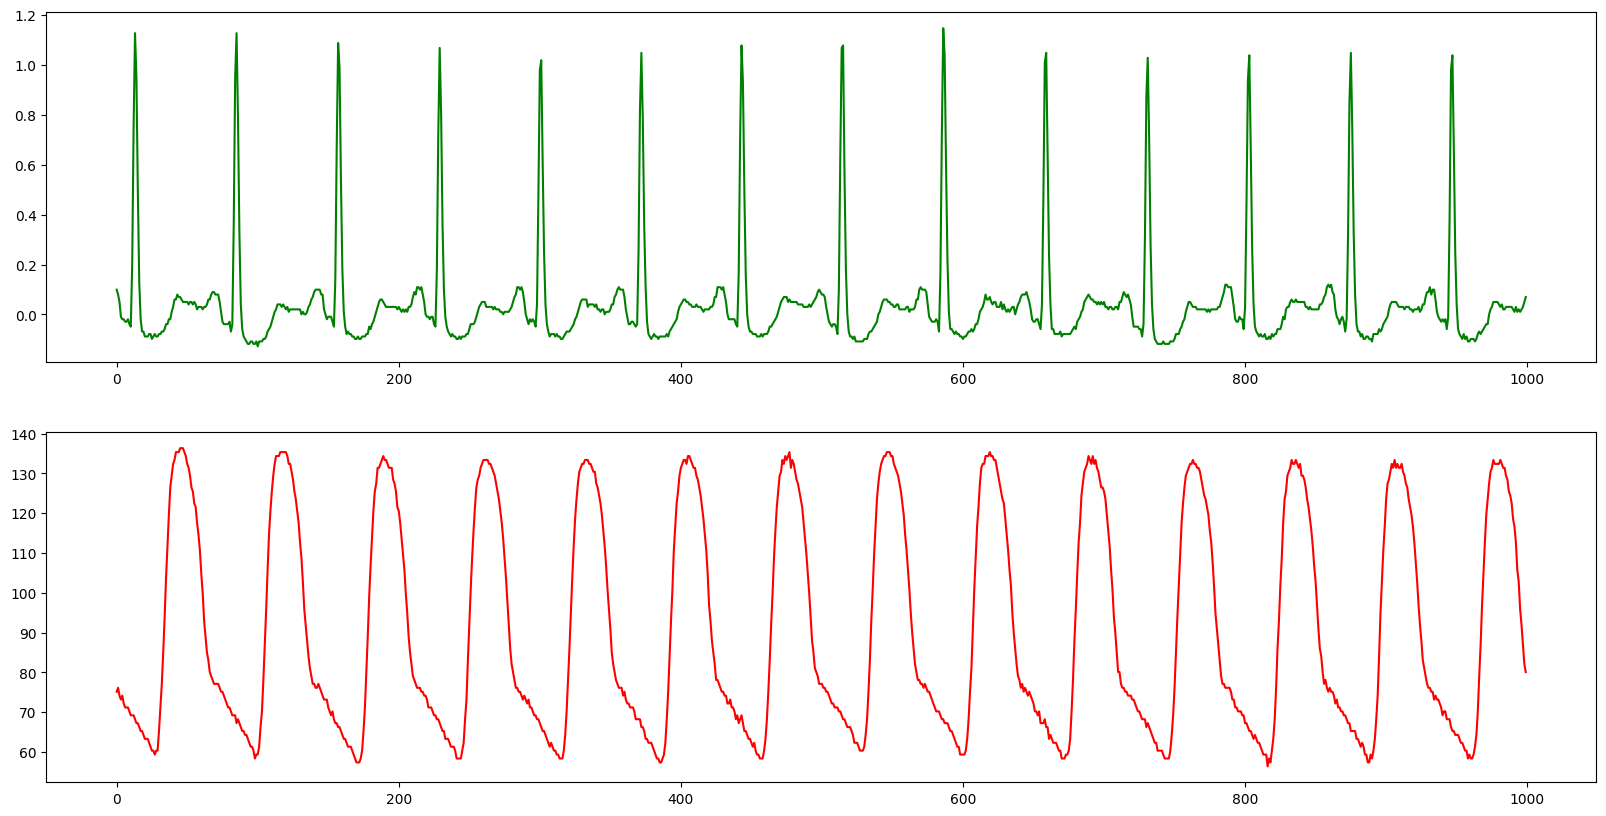

In [ ]:
#Q1. 'ECG_II','ART'를 250 Hz로 데이터를 읽어와봅시다.
vals = vitaldb.vital_recs('1.vital', ['ECG_II','ART'], #####INSERT YOUR CODE #######)

print(vals)

ecg = vals[:,0]
art = vals[:,1]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(211)

#Q2. ECG_II 데이터를 4초 만큼 그려봅시다.
plt.plot(ecg[110000:#####INSERT YOUR CODE #######], color='g')
plt.subplot(212)
plt.plot(art[110000:111000], color='r')
plt.show()

### Create VitalFile object
`VitalFile` class helps you read, write, and edit vital file easily and seamlessly. You can create `VitalFile` object by opening one or list of local or online vital file(s).

In [ ]:
vf = vitaldb.VitalFile('1.vital')
print(f'duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

duration 11542.097 seconds 79 tracks


You can even directly read the vital file online.

In [ ]:
vf = vitaldb.VitalFile('https://api.vitaldb.net/0001.vital')
print(f'duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

duration 11542.097 seconds 79 tracks


The code below create `VitalFile` object by merging two vital files.

> Note: Only vital files within 2 days can be merged into one file.

In [ ]:
vf1 = vitaldb.VitalFile('1-1.vital')
print(f'1-1 duration {vf1.dtend - vf1.dtstart:.3f} seconds {len(vf1.trks)} tracks')

vf2 = vitaldb.VitalFile('1-2.vital')
print(f'1-2 duration {vf2.dtend - vf2.dtstart:.3f} seconds {len(vf2.trks)} tracks')

vf = vitaldb.VitalFile(['1-1.vital', '1-2.vital'])  # merged
print(f'merged duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

1-1 duration 3908.135 seconds 79 tracks
1-2 duration 6621.162 seconds 79 tracks
merged duration 11542.097 seconds 79 tracks


### Read information from the VitalFile object

All information such as track list and measured samples are in the `vf` object. For example, you can get a list of track names using the `vf.get_track_names()` method or `vf.trks.keys()`.

In [ ]:
print(vf.get_track_names())
print(vf.trks.keys())

['SNUADC/ART', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH', 'Primus/CO2', 'Primus/AWP', 'Primus/INSP_SEVO', 'Primus/EXP_SEVO', 'Primus/PAMB_MBAR', 'Primus/MAWP_MBAR', 'Primus/MAC', 'Primus/VENT_LEAK', 'Primus/INCO2', 'Primus/ETCO2', 'Primus/FEO2', 'Primus/FIO2', 'Primus/FIN2O', 'Primus/FEN2O', 'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW', 'Primus/SET_AGE', 'Primus/PIP_MBAR', 'Primus/COMPLIANCE', 'Primus/PPLAT_MBAR', 'Primus/PEEP_MBAR', 'Primus/TV', 'Primus/MV', 'Primus/RR_CO2', 'Primus/SET_TV_L', 'Primus/SET_INSP_TM', 'Primus/SET_RR_IPPV', 'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_INSP_PAUSE', 'Primus/INSP_DES', 'Primus/EXP_DES', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/BIS', 'BIS/SQI', 'BIS/EMG', 'BIS/SR', 'BIS/SEF', 'BIS/TOTPOW', 'Solar8000/HR', 'Solar8000/ST_I', 'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_AVL', 'Solar8000/ST_AVR', 'Solar8000/ST_AVF', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP', 'Solar8000/ART_DBP', 'Solar8000/PLETH_SPO2', 'Solar8000/PLETH_HR', 'Sol

There are tracks in VitalFile which contains records.

In [ ]:
#Q3. 'SNUADC/ART' 트랙을 불러봐봅시다.

trk = vf.#####INSERT YOUR CODE #######
print(f'type: {trk.type} (1:wav, 2:num, 5:str)')  # track type
print(f'name: {trk.name}')  # name
print(f'device name: {trk.dname}')  # device name
print(f'sample rate: {trk.srate}')  # sample rate
print(f'unit: {trk.unit}')  # physical unit
print(f'mindisp: {trk.mindisp}')  # minimum value of display
print(f'maxdisp: {trk.maxdisp}')  # minimum value of display
print(f'color: {trk.col}')  # color (r*255*255 + g*255 + b)
print(trk.recs[0])

dict_keys(['SNUADC/ART', 'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH', 'Primus/CO2', 'Primus/AWP', 'Primus/INSP_SEVO', 'Primus/EXP_SEVO', 'Primus/PAMB_MBAR', 'Primus/MAWP_MBAR', 'Primus/MAC', 'Primus/VENT_LEAK', 'Primus/INCO2', 'Primus/ETCO2', 'Primus/FEO2', 'Primus/FIO2', 'Primus/FIN2O', 'Primus/FEN2O', 'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW', 'Primus/SET_AGE', 'Primus/PIP_MBAR', 'Primus/COMPLIANCE', 'Primus/PPLAT_MBAR', 'Primus/PEEP_MBAR', 'Primus/TV', 'Primus/MV', 'Primus/RR_CO2', 'Primus/SET_TV_L', 'Primus/SET_INSP_TM', 'Primus/SET_RR_IPPV', 'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_INSP_PAUSE', 'Primus/INSP_DES', 'Primus/EXP_DES', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/BIS', 'BIS/SQI', 'BIS/EMG', 'BIS/SR', 'BIS/SEF', 'BIS/TOTPOW', 'Solar8000/HR', 'Solar8000/ST_I', 'Solar8000/ST_II', 'Solar8000/ST_III', 'Solar8000/ST_AVL', 'Solar8000/ST_AVR', 'Solar8000/ST_AVF', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP', 'Solar8000/ART_DBP', 'Solar8000/PLETH_SPO2', 'Solar8000/PLETH

In [ ]:
len(trk.recs)

52638

In [ ]:
trk.recs[0]

{'dt': 4102444801.7878857,
 'val': array([494, 494, 494, 492, 495, 493, 495, 495, 494, 495, 494, 494, 494,
        494, 493, 494, 494, 495, 495, 493, 493, 494, 494, 494, 493, 495,
        495, 494, 493, 494, 493, 493, 493, 495, 493, 493, 494, 493, 493,
        494, 494, 494, 493, 494, 493, 495, 495, 493, 494, 494, 494, 493,
        494, 495, 493, 493, 493, 493, 493, 494, 494, 493, 494, 494, 494,
        494, 494, 494, 495, 494, 495, 494, 493, 494, 494, 494, 494, 494,
        493, 494, 494, 494, 495, 492, 494, 493, 494, 494, 494, 494, 493,
        494, 494, 494, 493, 494, 494, 493, 494, 495], dtype=uint16)}

### Read samples from the VitalFile object
You can read the samples using `to_numpy()` method which is equivalant to `vitaldb.vital_recs()`.

In [ ]:
vf.to_numpy(['ECG_II','ART'], 1/100)

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ -0.09797144, -20.65918   ],
       [ -0.06834793,  32.663483  ],
       [  0.45500422,  -4.8598633 ]], dtype=float32)

You can get the samples as a pandas DataFrame using `to_pandas()` method.

In [ ]:
# Q4. vital file을 Pandas 형태로 100Hz로 불러와봅시다.
df = vf.#####INSERT YOUR CODE #######
df

,Time,ECG_II,ART
0,2100-01-01 00:00:00+00:00,NaN,NaN
1,2100-01-01 00:00:00.010000+00:00,NaN,NaN
2,2100-01-01 00:00:00.020000+00:00,NaN,NaN
3,2100-01-01 00:00:00.030000+00:00,NaN,NaN
4,2100-01-01 00:00:00.040000+00:00,NaN,NaN
...,...,...,...
1154205,2100-01-01 03:12:22.050000+00:00,-0.413958,5.014709
1154206,2100-01-01 03:12:22.060000+00:00,0.366133,4.027252
1154207,2100-01-01 03:12:22.070000+00:00,-0.097971,-20.65918
1154208,2100-01-01 03:12:22.080000+00:00,-0.068348,32.663483


### Edit VitalFile object
You can edit VitalFile object. For example, you can crop it, remove or rename tracks and devices.

In [ ]:
# cropping
print(f'original duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')
vf.crop(vf.get_dt(2100, 1, 1, 1))  # remove samples before 2100 Jan 1, 1AM

# Q5. vital file의 첫 120초를 가져와봅시다.
vf.#####INSERT YOUR CODE #######  # remove samples within 120 sec from the beginning
print(f'cropped duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

# removing tracks
vf.remove_tracks(['ECG_FIVE'])
print(f'track removed duration {vf.dtend - vf.dtstart:.3f} seconds {len(vf.trks)} tracks')

# renaming tracks
vf.rename_tracks({'ECG_II': 'ECG_TWO', 'ECG_V5': 'ECG_FIVE'})
vf.rename_device('SNUADC', 'SUPER_NICE_ADC')

original duration 11542.097 seconds 79 tracks
cropped duration 7882.097 seconds 79 tracks
track removed duration 7882.097 seconds 79 tracks


### Save the VitalFile object to vital file
To save `VitalFile` object to vital file, call `to_vital()` with the file path to save.

In [ ]:
vf.to_vital('1_copyed.vital')

True

### Save the VitalFile object to csv file

In [ ]:
vf.to_csv('1.csv', ['ECG_II', 'ART'], 1/100, return_datetime=True)

import pandas as pd
pd.read_csv('1.csv')

,Time,ECG_II,ART
0,2100-01-01 01:01:00+00:00,NaN,NaN
1,2100-01-01 01:01:00.010000+00:00,NaN,NaN
2,2100-01-01 01:01:00.020000+00:00,NaN,NaN
3,2100-01-01 01:01:00.030000+00:00,NaN,NaN
4,2100-01-01 01:01:00.040000+00:00,NaN,NaN
...,...,...,...
788205,2100-01-01 03:12:22.050000+00:00,NaN,5.014709
788206,2100-01-01 03:12:22.060000+00:00,NaN,4.027252
788207,2100-01-01 03:12:22.070000+00:00,NaN,-20.659180
788208,2100-01-01 03:12:22.080000+00:00,NaN,32.663483


### Batch extraction of specific tracks from multiple vital files
The code below explains how to extract tracks from several vital files in the specific folder and save them with csv file format.

In [ ]:
import os

TRACK_NAMES = ['ECG_II', 'ART']
for filename in os.listdir('.'):  # iterate files
    if filename.endswith('.vital'):
        print('converting:' + filename, end='...', flush=True)
        vf = vitaldb.VitalFile(filename, TRACK_NAMES)  # read vital file
        vf.to_csv(filename + '.csv.gz', TRACK_NAMES, 1/100)  # save as compressed csv
        print('done')

import pandas as pd
pd.read_csv('1.vital.csv.gz')

converting:4.vital...done
converting:1.vital...done
converting:1_copyed.vital...done
converting:1-2.vital...done
converting:2.vital...done
converting:3.vital...done
converting:1-1.vital...done


,ECG_II,ART
0,0.899360,-7.822235
1,0.830238,-8.809692
2,0.780865,-7.822235
3,0.751241,-7.822235
4,0.741367,-8.809692
...,...,...
1154026,-0.413958,5.014710
1154027,0.366133,4.027252
1154028,-0.097971,-20.659180
1154029,-0.068348,32.663483


### Add event track to VitalFile
The code below explains how to add an event track to a specific vital file. It is useful when you need to perform automatic labelling for developing machine learning models.

In [ ]:
vf = vitaldb.VitalFile('1.vital')

# delete the first half
vf.crop((vf.dtstart + vf.dtend) // 2, None)

# find the last SET_TV_L records
event_recs = []
recs = vf.find_track('Primus/SET_TV_L').recs
if len(recs):
    event_recs.append({'dt': recs[-1]['dt'], 'val': 'Vent Off'})

# add event track
vf.add_track('EVENT', event_recs, mindisp=0, maxdisp=10)
vf.to_vital('1-labelled.vital')

True

## Platform API
You can login, list, and download vital files from the VitalDB platform using the `vitaldb` Platform API.

In [ ]:
# path to save downloaded files
import os
DOWNLOAD_DIR = "download"
if not os.path.exists(DOWNLOAD_DIR):
    os.mkdir(DOWNLOAD_DIR)

if vitaldb.login(id="vitaldb_test", pw="vitaldb_test"):
    for file in vitaldb.filelist(None, '2021-10-01'):
        print("Downloading: " + file['filename'], end='...', flush=True)
        vitaldb.download(file['filename'], DOWNLOAD_DIR + '/' + file['filename'])
        print('done')
else:
    print('login error')

You can read the vital file directly from the server by not specifing the file path to the `vitaldb.download` method.

In [ ]:
# vitaldb.login(id="vitaldb_test", pw="vitaldb_test")
# filename = vitaldb.filelist()[0]['filename']
# print(filename, end='...', flush=True)

# # read the vital file directly from the server (no local file will be created)
# vf = vitaldb.VitalFile(vitaldb.download(filename))
# print(f'{len(vf.get_track_names())} tracks')

### For intranet server
For intranet server, you can pass the host name and port number to the `vitaldb.login` function.

In [ ]:
# the code below will be executed only at SNUH
# vitaldb.login(id='admin', pw='pass', host='snuh.vitaldb.net', port=80)

## Open Dataset API
VitalDB python library also include the functions that support read VitalDB open dataset.

### Find cases in the VitalDB open dataset

In [ ]:
caseids = vitaldb.find_cases(['ECG_II', 'ART'])
len(caseids)

3644

### Read an open dataset case


[[         nan          nan]
 [         nan          nan]
 [         nan          nan]
 ...
 [  0.148893   -32.50870132]
 [ -0.32508701  19.82659912]
 [         nan          nan]]


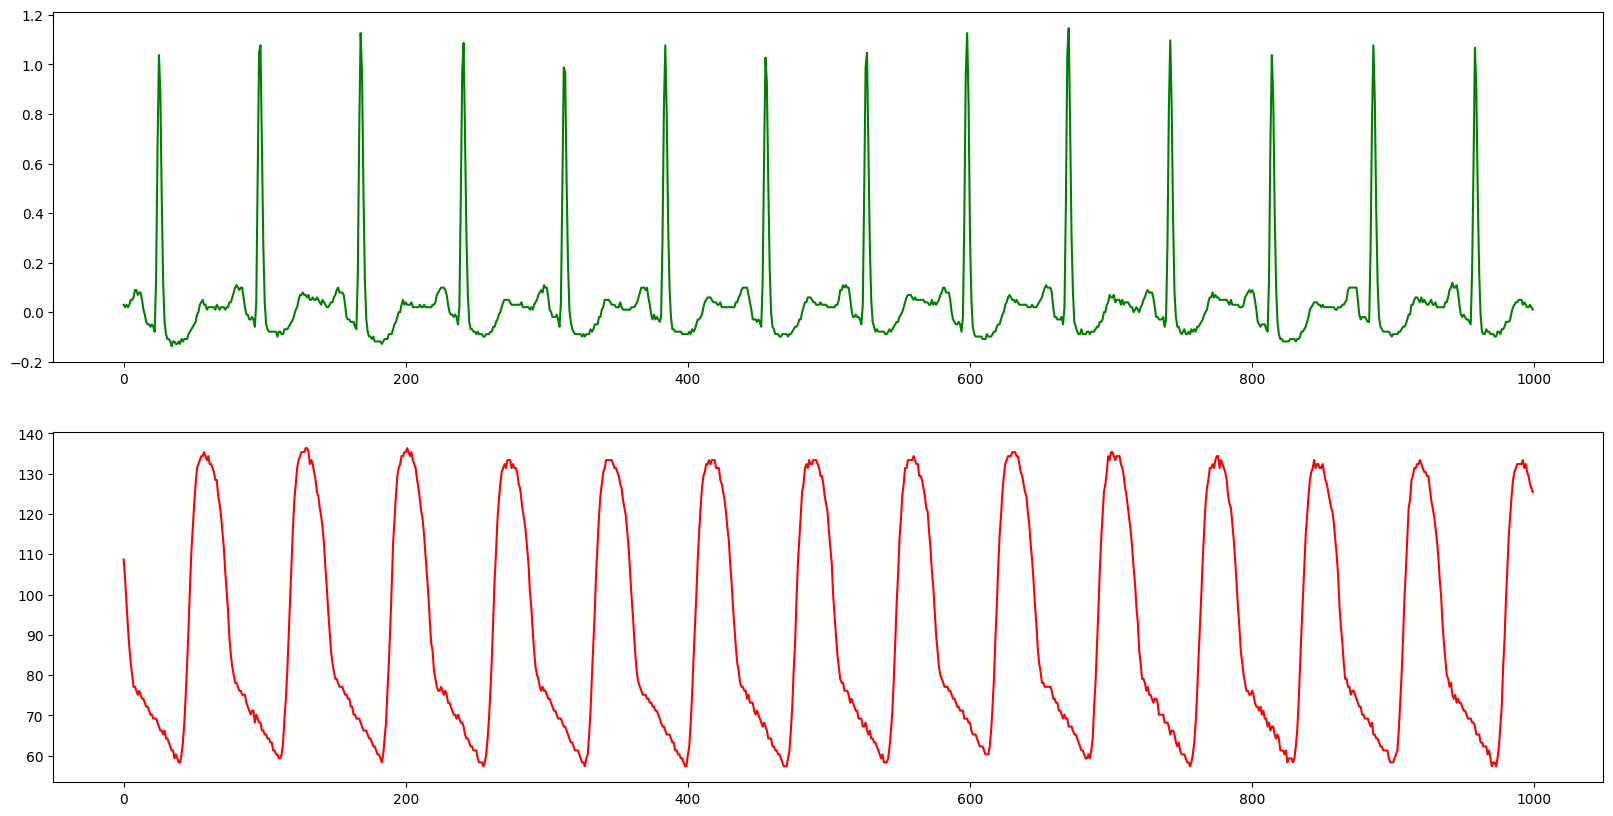

In [ ]:
# caseids의 첫번째 id의 'ECG_II','ART'를 추출해봅시다.
vals = vitaldb.load_case(, ['ECG_II','ART'], 1/100)
print(vals)

ecg = vals[:,0]
art = vals[:,1]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ecg[110000:111000], color='g')
plt.subplot(212)
plt.plot(art[110000:111000], color='r')
plt.show()

Same as `load_case` in the functional API, you can download the tracks from the VitalDB open dataset.

In [ ]:
vf = vitaldb.VitalFile(1, ['ECG_II', 'ART'])  # load the first case from open dataset
print(f'{len(vf.get_track_names())} tracks')

With the code below, you can download the first 5 cases that have 'Primus/AWP' track in the open dataset.

In [ ]:
track_names = ['AWP']
for caseid in vitaldb.find_cases(track_names)[:5]:
    vf = vitaldb.VitalFile(caseid, track_names)
    vf.to_vital(f'awp{caseid}.vital')